In [1]:
import cv2
from glob import glob
from pathlib import Path

from model import Model
from utils import plot

In [2]:
model = Model()

In [3]:
image_pathes = glob('./data/*.jpg')
image_pathes += glob('./data/*.png')
image_pathes[:2]

['./data/spacee.jpg', './data/private-car-park-with.jpg']

In [4]:
save_folder_path = Path('results')

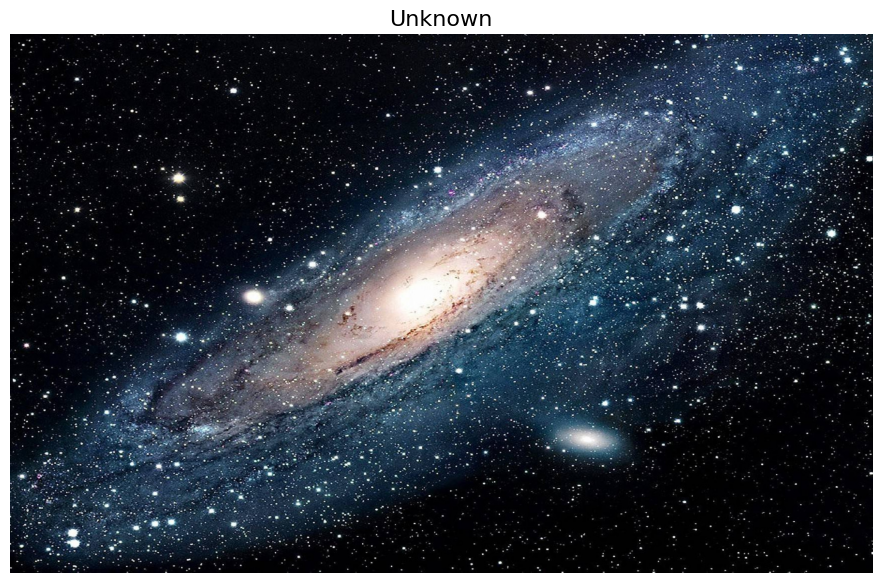

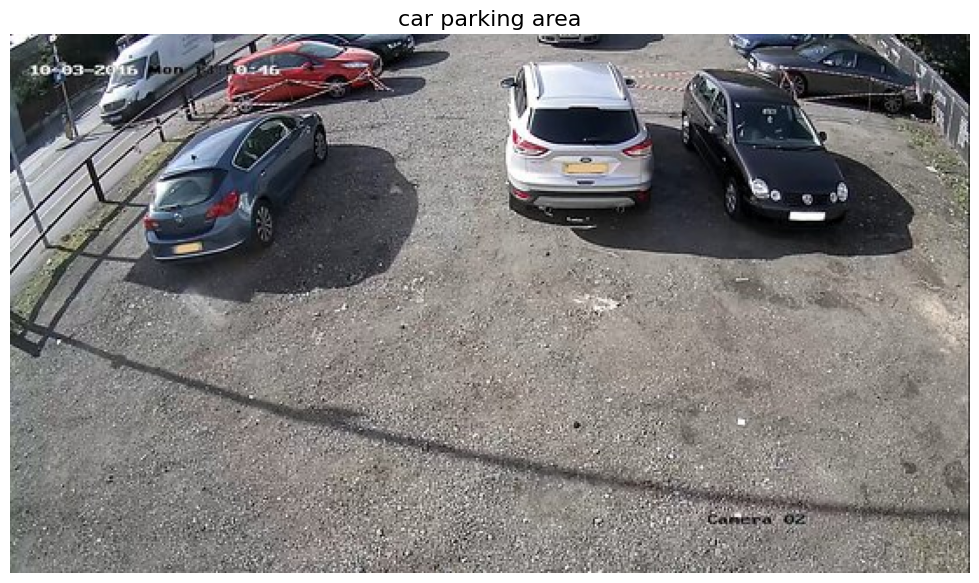

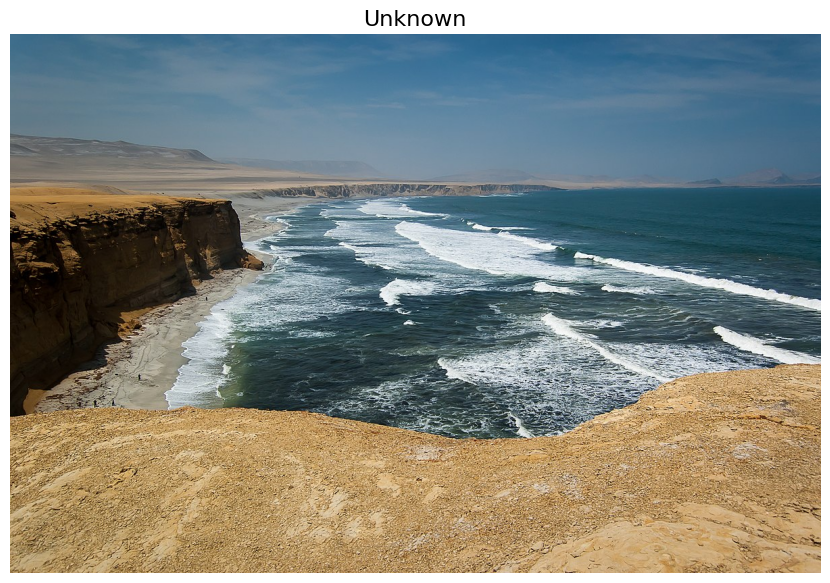

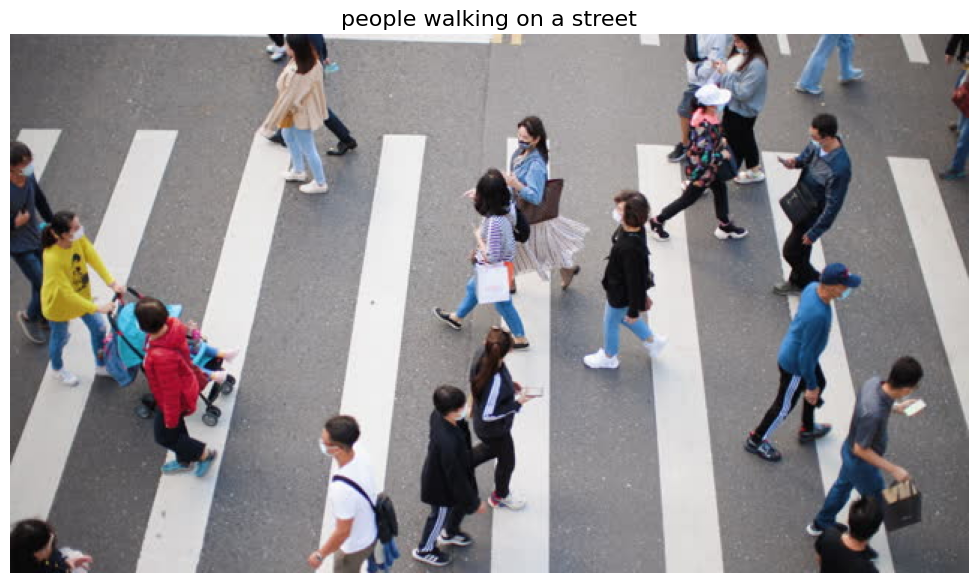

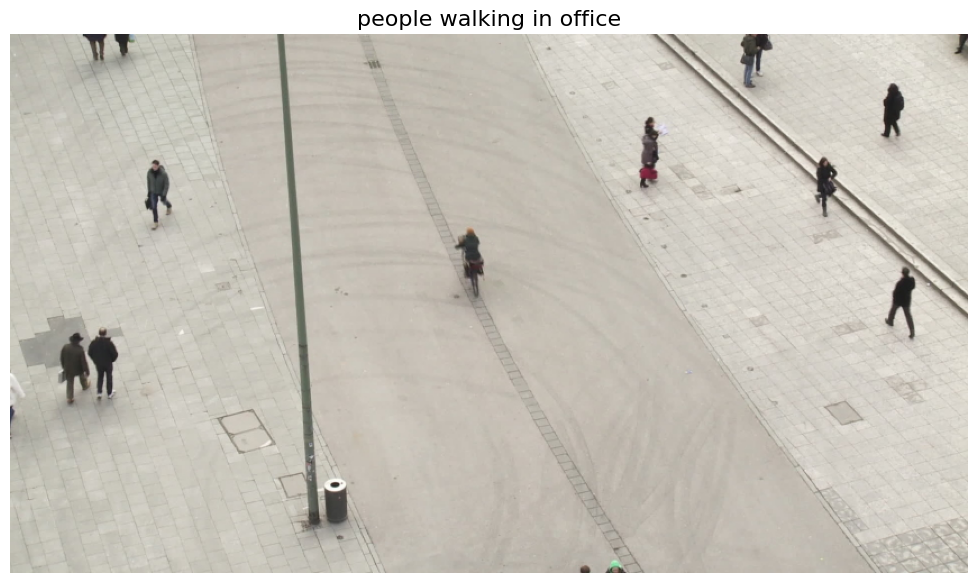

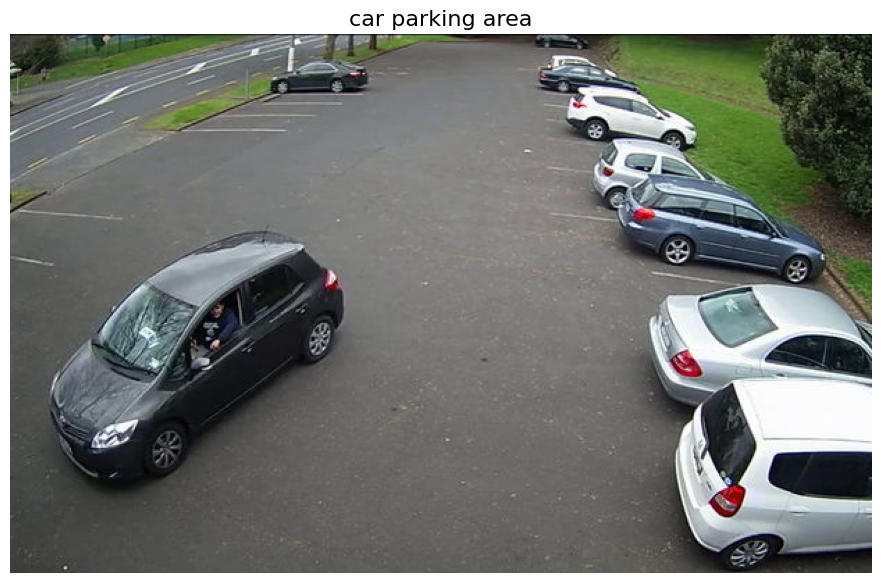

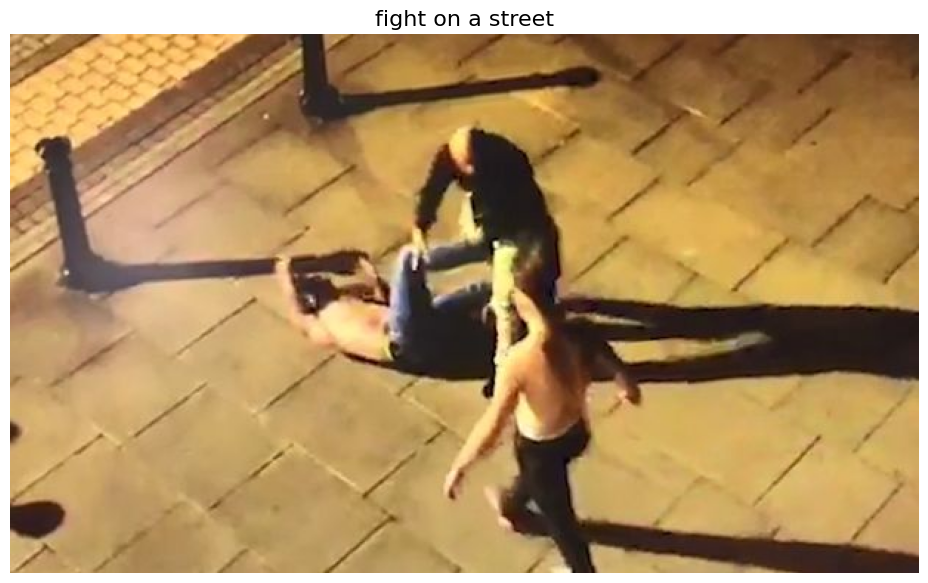

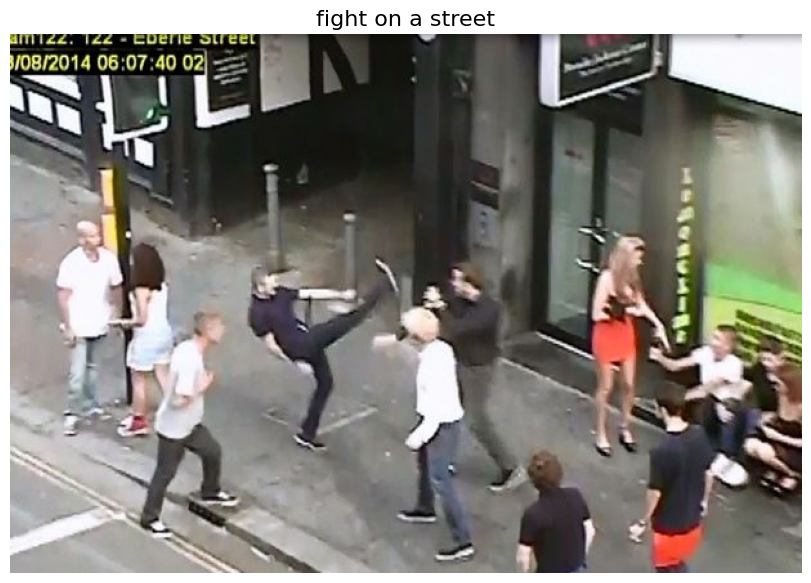

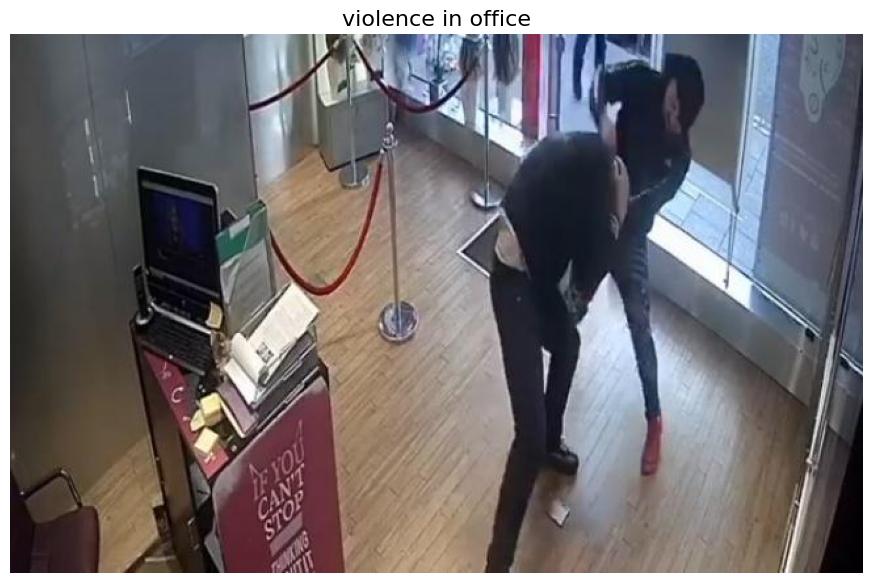

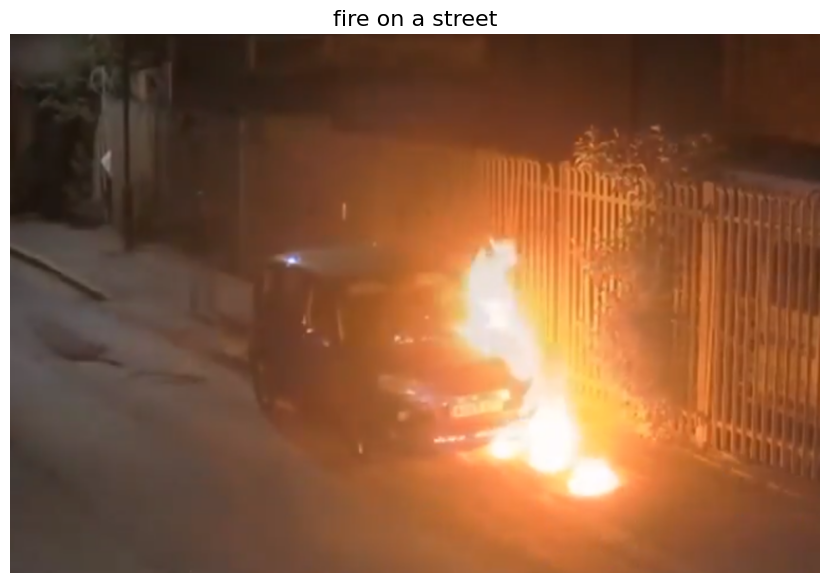

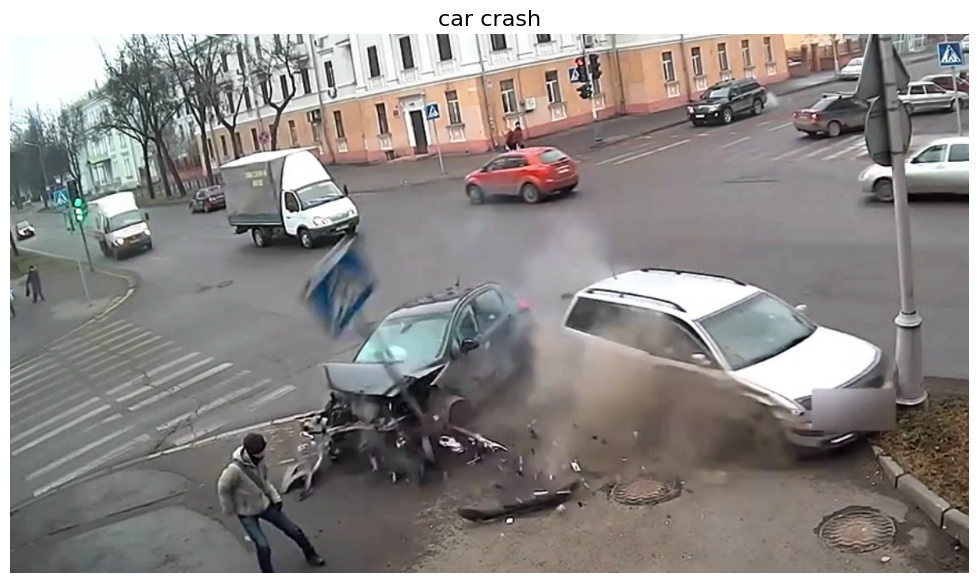

In [5]:
for i, image_path in enumerate(image_pathes):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = model.predict(image)['label']
    plot(image=image, title=label, 
         save_path=save_folder_path / f'{i}.jpg')

# Read video 
### and save predictions for each frame as another video

In [6]:
def process_video(input_video_path: str, output_path: str):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
    size = (width, height)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5)
    print('FPS', fps)
    success, frame = cap.read()
    
    out = cv2.VideoWriter(save_video_path, fourcc, fps, size)
    success = True


    while success and cap.isOpened():

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        prediction = model.predict(frame)
        label = prediction['label']
        conf = prediction['confidence']
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        frame = cv2.putText(frame, label.title(), 
                            (0, 100), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, 
                            (0, 0, 255), 2)

        cv2.imshow('Recording...', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        out.write(frame)
        success, frame = cap.read()

    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [ ]:
video_path = './data/fire.mp4'
save_video_path = str(save_folder_path / 'result_fire.avi')

process_video(video_path, save_video_path)

FPS 30


In [ ]:
video_path = './data/office_fight.mp4'
save_video_path = str(save_folder_path / 'result_fight.avi')

process_video(video_path, save_video_path)